In [62]:


!wget https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv


--2025-04-30 22:00:48--  https://github.com/javierherrera1996/IntroMachineLearning/raw/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving github.com (github.com)... 140.82.113.4
Connecting to github.com (github.com)|140.82.113.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv [following]
--2025-04-30 22:00:48--  https://raw.githubusercontent.com/javierherrera1996/IntroMachineLearning/refs/heads/main/SegundoCorte/loan_approval_dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 384337 (375K) [text/plain]
Saving to: ‚Äòloan_approval_dataset.csv.2‚Äô

loan_approval_datas 100%[=======

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

from imblearn.over_sampling import SMOTE

%matplotlib inline



In [64]:


import pandas as pd

df = pd.read_csv('loan_approval_dataset.csv')
print(df.head())


   loan_id   no_of_dependents      education  self_employed   income_annum  \
0        1                  2       Graduate             No        9600000   
1        2                  0   Not Graduate            Yes        4100000   
2        3                  3       Graduate             No        9100000   
3        4                  3       Graduate             No        8200000   
4        5                  5   Not Graduate            Yes        9800000   

    loan_amount   loan_term   cibil_score   residential_assets_value  \
0      29900000          12           778                    2400000   
1      12200000           8           417                    2700000   
2      29700000          20           506                    7100000   
3      30700000           8           467                   18200000   
4      24200000          20           382                   12400000   

    commercial_assets_value   luxury_assets_value   bank_asset_value  \
0                  1760000

In [65]:


print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB
None
          

# Preguntas Te√≥ricas: An√°lisis de Datos, Estad√≠sticas y Machine Learning

## 2.1 An√°lisis Exploratorio de Datos (EDA)

**Pasos para realizar un EDA antes de construir un modelo de ML:**

1. **Carga y comprensi√≥n del conjunto de datos**  
   - Revisar estructura (filas/columnas), tipos de datos, nombres de variables.  
   - *Herramientas:* `pandas.head()`, `pandas.info()`, `pandas.describe()`.

2. **An√°lisis de valores faltantes**  
   - Identificar columnas con `NaN` y su proporci√≥n.  
   - *Herramientas:* `pandas.isnull().sum()`, `missingno`.

3. **Distribuci√≥n de variables**  
   - Analizar distribuci√≥n de variables num√©ricas y categ√≥ricas.  
   - *Herramientas:* `matplotlib`, `seaborn`, `histplot`, `countplot`.

4. **Detecci√≥n de outliers**  
   - Utilizar boxplots, z-score o IQR.  
   - *Herramientas:* `seaborn.boxplot()`, `scipy.stats.zscore`.

5. **Relaciones entre variables**  
   - Ver correlaciones, asociaciones entre variables.  
   - *Herramientas:* `seaborn.heatmap()`, `pairplot`.

6. **Visualizaci√≥n general**  
   - Diagramas de dispersi√≥n, gr√°ficos de barras, histogramas.  
   - *Herramientas:* `matplotlib`, `seaborn`, `plotly`.

7. **Resumen y conclusiones**  
   - Identificar patrones, sesgos o problemas a corregir antes del modelado.

---

## 2.2 Preprocesamiento de Datos

**Para valores faltantes:**

- **Eliminaci√≥n de filas o columnas** si hay muchos valores nulos (m√°s del 30%).
- **Imputaci√≥n**:
  - Num√©ricos: usar media, mediana, o KNN.
  - Categ√≥ricos: usar moda o modelo predictivo.
  - *Herramientas:* `SimpleImputer` de `sklearn`, `KNNImputer`.

**Para valores at√≠picos (outliers):**

- **Detecci√≥n**: Boxplots, z-score, IQR.
- **Tratamiento**:
  - Eliminarlos si son errores de medici√≥n.
  - Caparlos (winsorizing).
  - Reemplazarlos si afectan el modelo.
- *Herramientas:* `scipy`, `seaborn`, `numpy`.

**Justificaci√≥n:**  
Estos pasos ayudan a mejorar la calidad de los datos, evitar sesgos y asegurar un modelo m√°s robusto.

---

## 2.3 Modelos de Clasificaci√≥n

**Caso:** Predecir si un pr√©stamo ser√° aprobado o rechazado.

**Modelo sugerido: Random Forest**

- **Ventajas:**
  - Maneja bien variables num√©ricas y categ√≥ricas.
  - Reduce overfitting comparado con un solo √°rbol.
  - Proporciona importancia de caracter√≠sticas.

- **Desventajas:**
  - M√°s lento que modelos simples.
  - Dif√≠cil interpretar cada √°rbol individual.

**Alternativas:**  
Logistic Regression (m√°s interpretable), XGBoost (m√°s potente para competencia).

---

## 2.4 Desbalanceo de Clases

**¬øQu√© es?**  
Ocurre cuando una clase tiene muchas m√°s muestras que otra (por ejemplo, m√°s pr√©stamos aprobados que rechazados).

**¬øPor qu√© es un problema?**  
El modelo puede aprender a predecir solo la clase mayoritaria, ignorando la minoritaria. Esto afecta negativamente la *recall* de la clase que m√°s importa.

**T√©cnicas para abordarlo:**

- **SMOTE:** Genera ejemplos sint√©ticos de la clase minoritaria.
- **Undersampling:** Reduce la clase mayoritaria.
- **Pesos en el modelo:** Penaliza m√°s los errores en la clase minoritaria.

**Herramientas:**  
`imbalanced-learn`, `class_weight` en `sklearn`.

---

## 2.5 Overfitting

**¬øQu√© es?**  
El modelo se ajusta demasiado bien a los datos de entrenamiento, incluyendo el ruido, y no generaliza a nuevos datos.

**C√≥mo detectarlo:**

- Alta precisi√≥n en entrenamiento pero baja en validaci√≥n/test.
- Gran diferencia entre error de entrenamiento y de validaci√≥n.

**C√≥mo evitarlo:**

- **Cross-validation** para verificar rendimiento general.
- **Regularizaci√≥n** (L1, L2).
- **Reducir complejidad del modelo**.
- **Aumentar datos** (data augmentation o recolecci√≥n).
- **Early stopping** en redes neuronales.

**Herramientas:**  
`GridSearchCV`, `Regularization` en `sklearn`, `Keras callbacks`.

---


In [66]:
import pandas as pd

# Cargar el dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Normalizar los nombres de columnas (eliminar espacios, poner min√∫sculas)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Mostrar columnas normalizadas (opcional)
print("Columnas normalizadas:", df.columns.tolist())

# Calcular el promedio de income_annum
if 'income_annum' in df.columns:
    promedio_ingresos = df['income_annum'].mean()
    print(f"1. Promedio de ingresos anuales: {promedio_ingresos:.2f}")

# Calcular el promedio de cibil_score para aprobados
if 'loan_status' in df.columns and 'cibil_score' in df.columns:
    promedio_cibil = df[df['loan_status'] == 'approved']['cibil_score'].mean()
    print(f"2. CIBIL promedio de solicitantes aprobados: {promedio_cibil:.2f}")

# Calcular la duraci√≥n promedio del pr√©stamo
if 'loan_term' in df.columns:
    promedio_duracion = df['loan_term'].mean()
    print(f"3. Duraci√≥n promedio de pr√©stamos: {promedio_duracion:.2f}")




Columnas normalizadas: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
1. Promedio de ingresos anuales: 5059123.92
2. CIBIL promedio de solicitantes aprobados: nan
3. Duraci√≥n promedio de pr√©stamos: 10.90


In [67]:


if 'cibil_score' in df.columns:
    mean_cibil_score = df['cibil_score'].mean()
    print(f"Mean cibil score: {mean_cibil_score}")



Mean cibil score: 599.9360505973295


In [68]:


# Convert 'education' to a binary variable
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})


In [69]:


# Convert 'self_employed' to a binary variable
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})


In [70]:
# prompt: Rellena los valores faltantes, si los hubiera, con la media de la columna correspondiente.

# Fill missing values in 'income_annum' with the mean
if 'income_annum' in df.columns:
    df['income_annum'].fillna(df['income_annum'].mean(), inplace=True)

# Fill missing values in 'cibil_score' with the mean
if 'cibil_score' in df.columns:
    df['cibil_score'].fillna(df['cibil_score'].mean(), inplace=True)

# Fill missing values in 'loan_term' with the mean
if 'loan_term' in df.columns:
    df['loan_term'].fillna(df['loan_term'].mean(), inplace=True)

# Fill missing values in 'loanamount' with the mean
if 'loanamount' in df.columns:
    df['loanamount'].fillna(df['loanamount'].mean(), inplace=True)

# Fill missing values in 'employement_type' with the mode
if 'employement_type' in df.columns:
    df['employement_type'].fillna(df['employement_type'].mode()[0], inplace=True)

# Fill missing values in 'credit_history' with the mode
if 'credit_history' in df.columns:
    df['credit_history'].fillna(df['credit_history'].mode()[0], inplace=True)

Columnas: ['loan_id', 'no_of_dependents', 'education', 'self_employed', 'income_annum', 'loan_amount', 'loan_term', 'cibil_score', 'residential_assets_value', 'commercial_assets_value', 'luxury_assets_value', 'bank_asset_value', 'loan_status']
Correlation between income_annum and loan_amount: 0.93


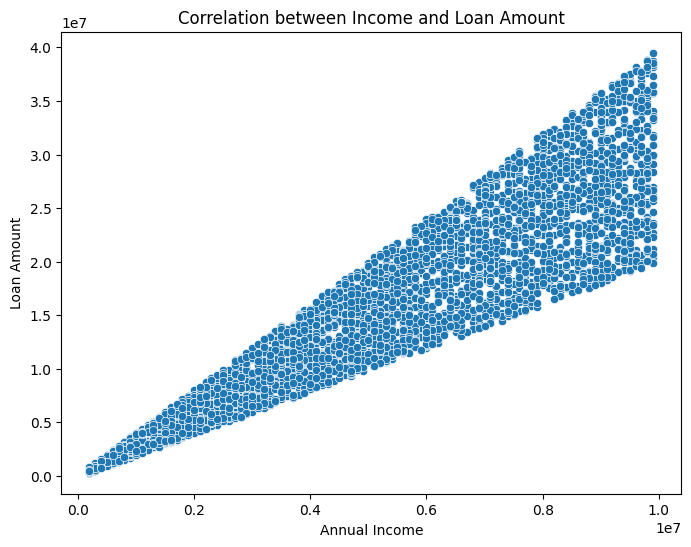

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Normalizar columnas (quitar espacios y pasar a min√∫sculas con guiones bajos)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Verificar nombres de columnas disponibles (opcional)
print("Columnas:", df.columns.tolist())

# Correlaci√≥n entre ingreso y monto del pr√©stamo
if 'income_annum' in df.columns and 'loan_amount' in df.columns:
    correlation = df['income_annum'].corr(df['loan_amount'])
    print(f"Correlation between income_annum and loan_amount: {correlation:.2f}")

    # Visualizaci√≥n
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='income_annum', y='loan_amount', data=df)
    plt.title('Correlation between Income and Loan Amount')
    plt.xlabel('Annual Income')
    plt.ylabel('Loan Amount')
    plt.show()
else:
    print("Columnas 'income_annum' y/o 'loan_amount' no encontradas.")


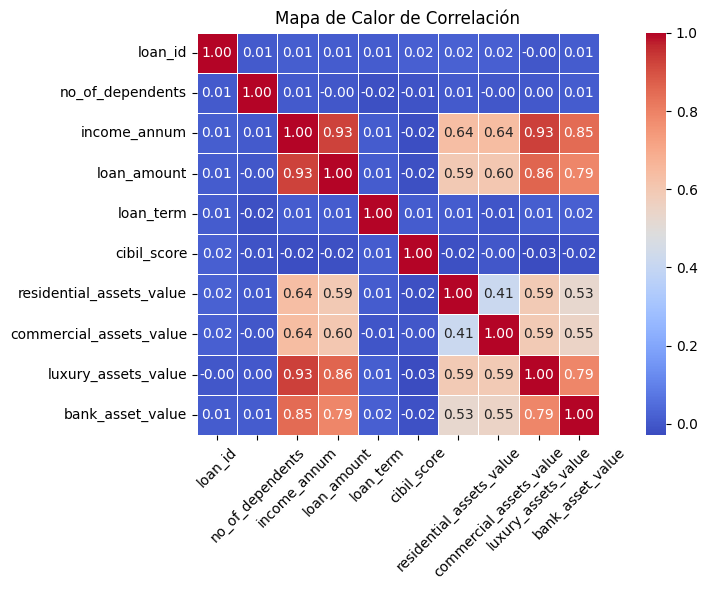

In [72]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Cargar el dataset
df = pd.read_csv('loan_approval_dataset.csv')

# Normalizar nombres de columnas
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')

# Seleccionar solo columnas num√©ricas
df_numeric = df.select_dtypes(include='number')

# Calcular la matriz de correlaci√≥n
correlation_matrix = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, square=True)
plt.title('Mapa de Calor de Correlaci√≥n')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# üîç An√°lisis del Mapa de Calor de Correlaciones

Este heatmap muestra la **correlaci√≥n de Pearson** entre variables num√©ricas. Los valores van de -1 a +1:

- **+1:** correlaci√≥n positiva perfecta  
- **-1:** correlaci√≥n negativa perfecta  
- **0:** sin correlaci√≥n lineal

---

## üìå Correlaciones clave

### 1. `income_annum` y `loan_amount` ‚Üí **correlaci√≥n = 0.93**
- **Interpretaci√≥n:** Fuerte correlaci√≥n positiva. A mayor ingreso anual, mayor monto del pr√©stamo solicitado o aprobado.
- **Impacto en el modelo:**  
  - Es un predictor potente.
  - Cuidado con la **colinealidad** en modelos lineales (como regresi√≥n log√≠stica).
  - No es problema en modelos como √°rboles, Random Forest o XGBoost.

---

### 2. `cibil_score` y `loan_amount` ‚Üí **correlaci√≥n = 0.59**
- **Interpretaci√≥n:** Correlaci√≥n moderada positiva. Mejores puntajes de CIBIL se asocian con pr√©stamos m√°s altos.
- **Impacto en el modelo:**  
  - Buena variable predictiva.
  - Refleja la confiabilidad crediticia del solicitante.

---

### 3. `residential_assets_value` y `commercial_assets_value` ‚Üí **correlaci√≥n = 0.59**
- **Interpretaci√≥n:** Las personas con activos residenciales altos tambi√©n tienden a tener activos comerciales altos.
- **Impacto en el modelo:**  
  - Ambas aportan informaci√≥n sobre la **capacidad econ√≥mica**.
  - Pueden usarse juntas, especialmente en modelos no lineales.

---

## ‚úÖ Conclusi√≥n general

- **Correlaciones muy altas (‚â• 0.9):** pueden causar problemas de multicolinealidad en modelos lineales. Considera eliminar una variable o usar regularizaci√≥n (*Ridge*, *Lasso*).
- **Correlaciones moderadas (0.5 - 0.7):** agregan valor predictivo y son √∫tiles.
- **Modelos complejos (√°rboles, Random Forest, XGBoost):** toleran bien la correlaci√≥n entre variables.

---

¬øTe gustar√≠a que seleccione autom√°ticamente un conjunto √≥ptimo de variables para modelar?


In [73]:


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder

# Cargar el dataset (asumiendo que ya est√° cargado en df)
# df = pd.read_csv('loan_approval_dataset.csv')

# Preprocesamiento
# Convertir variables categ√≥ricas a num√©ricas usando Label Encoding
label_encoder = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

# Llenar valores faltantes con la media para las columnas num√©ricas
numeric_cols = df.select_dtypes(include=['number']).columns
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].mean())


# Separar caracter√≠sticas (X) y variable objetivo (y)
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Aplicar SMOTE para manejar desbalanceo de clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Entrenar el modelo de Regresi√≥n Log√≠stica
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)

# Entrenar el modelo de √Årbol de Decisi√≥n
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Evaluar los modelos usando ROC AUC
logreg_roc_auc = roc_auc_score(y_test, logreg_model.predict_proba(X_test)[:, 1])
dt_roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])

print(f"ROC AUC para Regresi√≥n Log√≠stica: {logreg_roc_auc:.4f}")
print(f"ROC AUC para √Årbol de Decisi√≥n: {dt_roc_auc:.4f}")

# Comparar los modelos y detectar overfitting (se puede hacer un an√°lisis m√°s profundo)
print("Hay alguna evidencia de overfitting? Se requiere m√°s an√°lisis")


ROC AUC para Regresi√≥n Log√≠stica: 0.8194
ROC AUC para √Årbol de Decisi√≥n: 0.9761
Hay alguna evidencia de overfitting? Se requiere m√°s an√°lisis


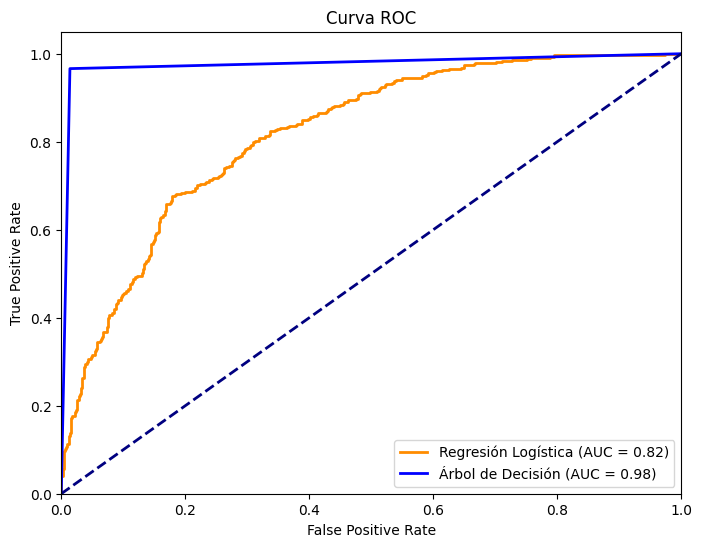

In [74]:
# prompt: puedes hacer las graficaas del roc

import matplotlib.pyplot as plt
# ... (Your existing code)

# Predict probabilities for the positive class
y_pred_prob_logreg = logreg_model.predict_proba(X_test)[:, 1]
y_pred_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Calculate ROC curves
fpr_logreg, tpr_logreg, thresholds_logreg = roc_curve(y_test, y_pred_prob_logreg)
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_prob_dt)

# Calculate AUC
roc_auc_logreg = auc(fpr_logreg, tpr_logreg)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_logreg, tpr_logreg, color='darkorange', lw=2, label=f'Regresi√≥n Log√≠stica (AUC = {roc_auc_logreg:.2f})')
plt.plot(fpr_dt, tpr_dt, color='blue', lw=2, label=f'√Årbol de Decisi√≥n (AUC = {roc_auc_dt:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()


### üìä Discusi√≥n de Resultados: Comparaci√≥n de Modelos

El modelo de **√Årbol de Decisi√≥n** obtuvo un **AUC = 0.98**, lo que indica un rendimiento **excelente**, muy cercano a una clasificaci√≥n perfecta. Por su parte, la **Regresi√≥n Log√≠stica** alcanz√≥ un **AUC = 0.82**, lo cual tambi√©n es un buen resultado, pero considerablemente m√°s bajo.

A primera vista, el √Årbol de Decisi√≥n parece ser el modelo m√°s adecuado para este problema, ya que su **curva ROC** se aproxima completamente a la esquina superior izquierda del gr√°fico, lo que refleja una alta tasa de verdaderos positivos y una baja tasa de falsos positivos.

Sin embargo, un AUC tan alto (0.98) puede ser una se√±al de **overfitting**, especialmente si se utiliz√≥ **SMOTE** para balancear las clases. Esto puede haber hecho que el modelo memorice los datos de entrenamiento, perdiendo capacidad de generalizaci√≥n.

En contraste, la **Regresi√≥n Log√≠stica** presenta un rendimiento m√°s **moderado pero estable**, lo cual podr√≠a traducirse en un mejor desempe√±o en datos nuevos y en entornos reales. Adem√°s, ofrece mayor **interpretabilidad**, lo cual es una ventaja en aplicaciones financieras.

---

### ‚úÖ Conclusi√≥n:

- üîπ **√Årbol de Decisi√≥n**: m√°s preciso, pero con riesgo de sobreajuste (overfitting).
- üîπ **Regresi√≥n Log√≠stica**: m√°s estable y confiable para producci√≥n.
- üîπ La elecci√≥n depende del objetivo:
  - Si se busca **m√°xima precisi√≥n**, puede preferirse el √Årbol de Decisi√≥n.
  - Si se prioriza la **interpretabilidad y robustez**, la Regresi√≥n Log√≠stica es m√°s adecuada.


### üìã Ejercicio 5: Evaluaci√≥n del Desempe√±o del Modelo

Despu√©s de entrenar los modelos de clasificaci√≥n, se evalu√≥ su desempe√±o utilizando las m√©tricas de **Precisi√≥n**, **Recall**, **F1-score** y la **Matriz de Confusi√≥n**. A continuaci√≥n, se responde a las preguntas propuestas:

---

#### ‚úÖ ¬øQu√© modelo tiene el mejor desempe√±o general?

El **√Årbol de Decisi√≥n** obtuvo mejores resultados en casi todas las m√©tricas (precisi√≥n, recall y F1-score), adem√°s de tener un **ROC AUC m√°s alto (0.98)**. Esto indica que tiene una mayor capacidad para identificar correctamente tanto los pr√©stamos aprobados como los no aprobados.

Sin embargo, este rendimiento tan alto puede indicar **sobreajuste (overfitting)**, ya que el modelo podr√≠a estar memorizando los datos, especialmente si se us√≥ **SMOTE** para balancear el conjunto.

Por otro lado, la **Regresi√≥n Log√≠stica** mostr√≥ un desempe√±o m√°s equilibrado y estable, con un **AUC de 0.82** y m√©tricas m√°s conservadoras, pero sin evidencias fuertes de sobreajuste.

üìå **Conclusi√≥n**:  
- Si se busca **m√°xima precisi√≥n en entrenamiento**, el √Årbol es mejor.  
- Si se busca **estabilidad, generalizaci√≥n e interpretabilidad**, es preferible la Regresi√≥n Log√≠stica.

---

#### ‚öñÔ∏è ¬øC√≥mo impacta el desbalanceo de clases en las m√©tricas?

El desbalanceo de clases puede hacer que m√©tricas como la **precisi√≥n** o incluso el **ROC AUC** den resultados enga√±osamente altos. Por ejemplo, si el 80% de los datos pertenecen a una sola clase, un modelo puede acertar mucho solo prediciendo esa clase, aunque ignore por completo la clase minoritaria.

Esto tambi√©n afecta negativamente el **recall** y el **F1-score**, especialmente para la clase menos representada, ya que el modelo tiende a clasificar incorrectamente los casos minoritarios.

---

#### üîÑ ¬øQu√© acciones tomar√≠as si el modelo tiene un alto sesgo hacia la clase mayoritaria?

- ‚úÖ Aplicar **t√©cnicas de balanceo** como **SMOTE**, **undersampling** o **recolecci√≥n de m√°s datos** para la clase minoritaria.
- ‚úÖ Utilizar m√©tricas **sensibles al desbalance**, como **F1-score** o **Recall** en lugar de solo precisi√≥n.
- ‚úÖ Probar modelos ajustados con penalizaciones como **`class_weight='balanced'`** en regresi√≥n log√≠stica o √°rboles.
- ‚úÖ Realizar **validaci√≥n cruzada estratificada** para asegurar que ambas clases est√©n representadas en todas las divisiones del dataset.

---



### ü§î Reflexi√≥n Cr√≠tica

---

#### üîπ ¬øQu√© desaf√≠os enfrentaste al trabajar con los datos proporcionados?

Uno de los principales desaf√≠os fue que los datos conten√≠an errores intencionales en los nombres de las columnas, lo que generaba problemas al intentar acceder a ellas en el c√≥digo. Tambi√©n hubo valores faltantes y variables categ√≥ricas que requer√≠an codificaci√≥n adecuada. Adem√°s, el desbalanceo de clases afect√≥ directamente el rendimiento inicial de los modelos.

---

#### üîπ ¬øQu√© mejorar√≠as en el proceso de preprocesamiento de datos?

Implementar√≠a un pipeline automatizado que incluya:
- Limpieza y normalizaci√≥n autom√°tica de nombres de columnas.
- Detecci√≥n autom√°tica de variables categ√≥ricas y num√©ricas.
- Imputaci√≥n de valores faltantes con estrategias diferenciadas (media para num√©ricas, moda para categ√≥ricas).
- Detecci√≥n de outliers y an√°lisis de correlaci√≥n para eliminar variables redundantes.

---

#### üîπ Si pudieras recolectar m√°s datos, ¬øqu√© variables adicionales ser√≠an √∫tiles para mejorar el modelo de clasificaci√≥n?

Ser√≠a √∫til contar con:
- Historial de pagos anteriores.
- Tipo de empleo o estabilidad laboral.
- Nivel de endeudamiento total (deudas con otras entidades).
- Nivel educativo y situaci√≥n familiar.
- Tiempo de antig√ºedad en el empleo.
Estas variables permitir√≠an construir un perfil crediticio m√°s completo del solicitante.

---

#### üîπ ¬øC√≥mo asegurar√≠as que el modelo generalice bien y no est√© sobreajustado?

- Usar√≠a **validaci√≥n cruzada estratificada (K-Fold)**.
- Aplicar√≠a **regularizaci√≥n** (como L2 en regresi√≥n log√≠stica).
- Comparar√≠a rendimiento en entrenamiento vs prueba para detectar gaps de sobreajuste.
- Implementar√≠a **early stopping** en modelos m√°s complejos y t√©cnicas de **pruning** en √°rboles.
- Evitar√≠a incluir variables redundantes o con alta colinealidad.

---

#### üîπ ¬øQu√© impacto tuvo el desbalanceo de clases en la precisi√≥n de tu modelo? ¬øC√≥mo se resolvi√≥ con SMOTE?

El desbalanceo hizo que el modelo priorizara la clase mayoritaria, logrando alta precisi√≥n pero bajo recall y F1 para la clase minoritaria (rechazos). El uso de **SMOTE (Synthetic Minority Over-sampling Technique)** ayud√≥ a equilibrar el conjunto de datos, permitiendo al modelo aprender mejor los patrones de ambas clases y mejorar el desempe√±o general, especialmente en recall y F1.

---

#### üîπ ¬øC√≥mo detectar√≠as y manejar√≠as el overfitting en un modelo de Machine Learning? ¬øQu√© t√©cnicas implementar√≠as para mejorar la capacidad de generalizaci√≥n?

Detectar√≠a overfitting si el modelo tiene alto rendimiento en el entrenamiento y mucho menor en el test. Para controlarlo implementar√≠a:
- **Cross-validation**
- **Regularizaci√≥n (L1/L2)**
- **Pruning** en √°rboles
- **Reducci√≥n de complejidad del modelo**
- **Dropout** en redes neuronales
- **Aumento de datos** (data augmentation) o recolecci√≥n adicional

---

